### Importing

In [11]:
import cv2
import os
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr

### Setting up a capture

In [12]:
cap = cv2.VideoCapture(os.path.join('abc.mp4'))

In [13]:
ret,frame = cap.read()

In [14]:
frame

array([[[ 37,  39,  32],
        [ 37,  39,  32],
        [ 37,  39,  32],
        ...,
        [195, 206, 208],
        [195, 206, 208],
        [195, 206, 208]],

       [[ 37,  39,  32],
        [ 37,  39,  32],
        [ 37,  39,  32],
        ...,
        [195, 206, 208],
        [195, 206, 208],
        [195, 206, 208]],

       [[ 37,  39,  32],
        [ 37,  39,  32],
        [ 37,  39,  32],
        ...,
        [195, 206, 208],
        [195, 206, 208],
        [195, 206, 208]],

       ...,

       [[131, 140, 141],
        [149, 158, 159],
        [161, 170, 171],
        ...,
        [168, 176, 179],
        [165, 173, 176],
        [164, 172, 175]],

       [[147, 156, 157],
        [163, 172, 173],
        [170, 179, 180],
        ...,
        [159, 167, 170],
        [162, 170, 173],
        [163, 171, 174]],

       [[162, 171, 172],
        [162, 171, 172],
        [160, 169, 170],
        ...,
        [159, 167, 170],
        [163, 171, 174],
        [165, 173, 176]]

In [15]:
frame.shape

(1080, 1920, 3)

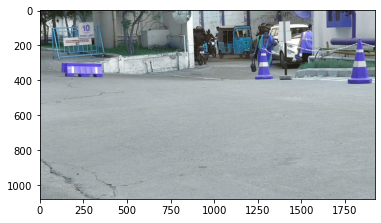

In [16]:
plt.imshow(frame)
plt.show()

In [17]:
recolor = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)

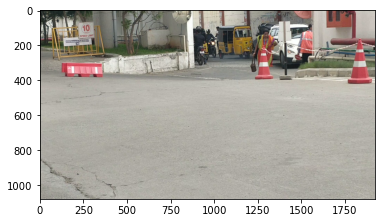

In [18]:
plt.imshow(recolor)
plt.show()

### Capture properties

In [19]:
cap.get(cv2.CAP_PROP_FRAME_HEIGHT)

1080.0

In [20]:
cap.get(cv2.CAP_PROP_FRAME_WIDTH)

1920.0

In [21]:
# number of frames
cap.get(cv2.CAP_PROP_FRAME_COUNT)

4317.0

In [22]:
cap.get(cv2.CAP_PROP_FPS)

30.043291359832647

In [23]:
4317.0/30.043291359832647 # prints the total length of the video in seconds

143.692645

### Working with video capture

In [ ]:
# By running this code it captures total number of frames from the video (4317)

vidcap = cv2.VideoCapture('abc.mp4')
success,image = vidcap.read()
count = 0
while success:
  cv2.imwrite("frame%d.jpg" % count, image)     
  success,image = vidcap.read()
  print('Read a new frame: ', success)
  count += 1

### Read the image

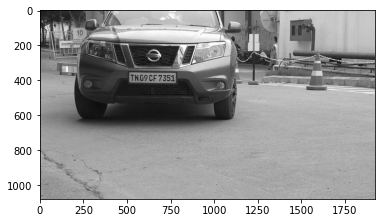

In [24]:
img = cv2.imread('frame4171.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

### Edge Detection

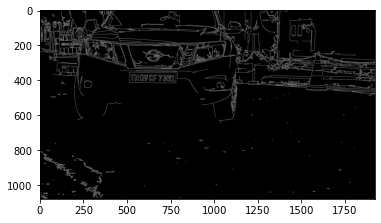

In [25]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #Noise reduction
edged = cv2.Canny(bfilter, 30, 200) #Edge detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

### Contours and  Mask

In [26]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [27]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break

In [28]:
location

array([[[511, 357]],

       [[516, 414]],

       [[779, 412]],

       [[777, 358]]], dtype=int32)

In [29]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

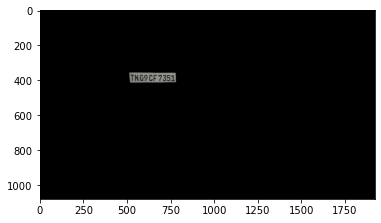

In [30]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [31]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

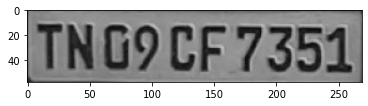

In [32]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

### Easy OCR To Read Text

In [33]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.
C:\Users\tusha\anaconda3\lib\site-packages\torchvision\models\_utils.py:252: UserWarning: Accessing the model URLs via the internal dictionary of the module is deprecated since 0.13 and will be removed in 0.15. Please access them via the appropriate Weights Enum instead.
  warnings.warn(
C:\Users\tusha\anaconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
C:\Users\tusha\anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


[([[2, 4], [268, 4], [268, 58], [2, 58]], 'TNG? CF 7351', 0.4324113728335426)]

### Final Result

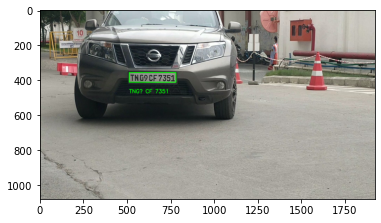

In [34]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))